### Part A

In [31]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import graphviz
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
data_P2 = pd.read_csv("CE802_P2_Data.csv")
data_P2.replace({False: 0, True: 1}, inplace=True) #replacing boolean values with 0 and 1
data_P2.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-0.123210,2577.32,2183.52,7747.32,2.16,9693.21,-2.2498,-1381.98,3033.55,53.796,...,6.7860,1,-3.9290,-0.8095,3.5800,-5.9384,-9.3420,1,NaN,1
1,-2.064600,1200.12,1654.74,6027.72,2.16,9391.26,-2.7420,-1336.20,2081.35,33.514,...,5.5240,0,-1.6609,-2.3020,3.8880,-6.5640,-6.3806,1,NaN,0
2,-0.083748,2769.35,2661.42,7798.66,2.16,9296.28,-3.2130,-1531.16,3397.15,39.430,...,10.0870,0,-2.5100,-2.8190,2.1606,-5.2340,-9.6780,0,NaN,0
3,-2.808300,3161.52,2199.12,8369.32,5.16,7990.71,-2.2703,-1397.03,3289.99,42.012,...,15.5400,1,-2.2555,-0.9770,8.2160,-5.8166,-6.1512,0,42.06,1
4,-0.445800,2707.42,2083.62,9054.72,5.16,8691.81,-3.7310,-804.04,1903.35,43.172,...,4.5188,0,-1.7843,-1.3690,0.7562,-6.4060,-9.5320,0,NaN,1


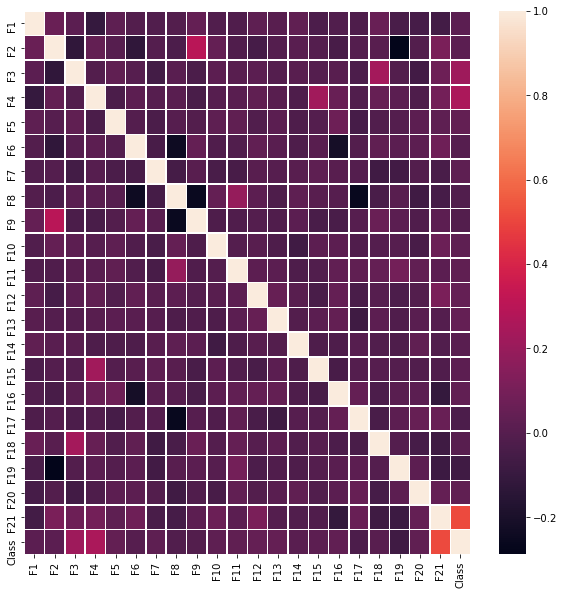

In [33]:
# describing correlation of attributes using heatmap
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data_P2.corr(), linewidths=.5, ax=ax)
plt.show()

### Finding number of null values for each column

In [34]:
def is_there_null(df):
    for c in df.columns:
        if df[c].isnull().values.any():
            print("Attribute {} has {} number of null values".format(c,df[c].isna().sum()))
            return True
    return False

### Descrpitve statistics measures for the null contained column/s before imputation

In [35]:
is_there_null(data_P2)
data_P2.F21.describe()

Attribute F21 has 500 number of null values


count    500.000000
mean      35.050560
std        3.188244
min       24.930000
25%       32.850000
50%       34.905000
75%       37.275000
max       45.360000
Name: F21, dtype: float64

### It seems that linear interpolation method does not fill all the null values, in this case for the remained null values (eg. 3), I try to replace their coulmn mean values for them.

In [36]:
def imputation(df):
    if is_there_null(df):
        df = df.interpolate(method = "linear", limit_direction = "forward")
        if is_there_null(df):
            df.fillna(df.mean(), inplace = True)
        print("There is no null value anymore")
        return df
    else:
        return "There is no need to do imputation"

In [37]:
def drop_null_values(df):
    return df.dropna(inplace = False)

### Checking descriptive statistics measures for the null contained column/s after imputation

In [38]:
data_P2_dropped = drop_null_values(data_P2)
data_P2 = imputation(data_P2)
data_P2.F21.describe()

Attribute F21 has 500 number of null values
Attribute F21 has 3 number of null values
There is no null value anymore


count    1000.000000
mean       35.174188
std         2.813204
min        24.930000
25%        33.257500
50%        35.155000
75%        37.125000
max        45.360000
Name: F21, dtype: float64

### Checking descriptive statistics measures for the null-dropped dataframe

In [39]:
data_P2_dropped.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-1.536101,2490.874249,2127.981506,8432.020964,3.648000,8601.422092,-2.349124,-1271.697345,3223.829824,36.618555,...,14.503379,0.484000,-2.316238,-1.376661,2.408777,-6.203729,-7.548136,0.510000,35.050560,0.502000
std,2.067428,782.593081,1527.993185,1837.001971,1.501454,2112.516007,0.630371,433.900868,472.311274,9.824823,...,10.672447,0.500244,0.887085,0.934030,1.847123,1.631964,1.782316,0.500401,3.188244,0.500497
min,-13.587000,-2309.880000,-1690.080000,1078.920000,2.160000,-5873.790000,-5.111000,-4531.040000,630.350000,6.440000,...,4.237677,0.000000,-5.675000,-4.955000,0.344240,-13.194000,-14.534000,0.000000,24.930000,0.000000
25%,-1.947300,2422.995000,1504.095000,7651.365000,2.160000,8327.235000,-2.708250,-1421.748000,3070.600000,30.054000,...,7.233250,0.000000,-2.790750,-1.781000,0.982050,-6.950000,-8.201000,0.000000,32.850000,0.000000
50%,-0.720900,2704.670000,1770.240000,8047.520000,2.160000,9015.165000,-2.211000,-1356.440000,3211.581500,36.706600,...,11.255500,0.000000,-2.005200,-1.079850,1.891200,-5.729400,-7.013900,1.000000,34.905000,1.000000
75%,-0.209430,2836.414000,2199.420000,8691.520000,5.160000,9416.055000,-1.851575,-1220.125000,3332.900000,42.770000,...,18.027500,1.000000,-1.663950,-0.666550,3.164000,-4.958000,-6.221050,1.000000,37.275000,1.000000
max,-0.060016,4156.120000,18814.920000,20418.920000,5.160000,15432.210000,-1.570592,1284.960000,6685.350000,75.180000,...,86.010000,1.000000,-1.342710,-0.402990,9.106000,-4.425460,-5.686740,1.000000,45.360000,1.000000


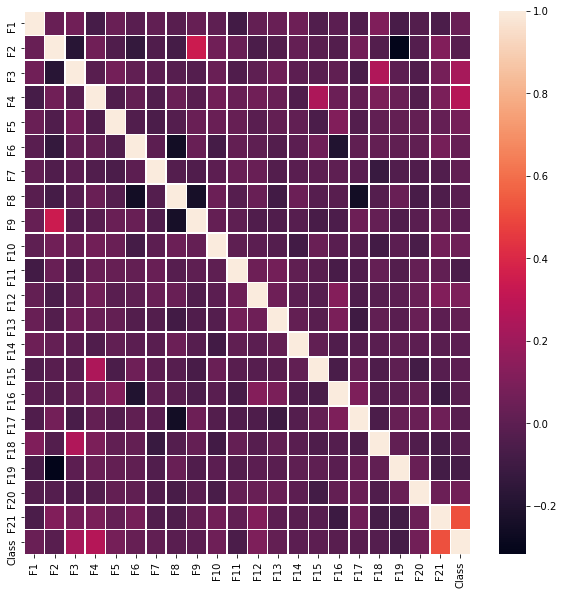

In [40]:
# describing correlation of attributes using heatmap for the null-dropped dataframe
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data_P2_dropped.corr(), linewidths=.5, ax=ax)
plt.show()

### Splitting the target data from the rest of data to be used for the next stages of the project

In [41]:
def target_splitter(data, target):
    X = data.loc[:, data.columns != target].to_numpy()
    y = data.loc[:, data.columns == target].to_numpy()
    return X, y

### defining a function to perform nested cross validation to train a decision tree classifier

In [42]:
def decision_tree_fit(data):
    X, y = target_splitter(data, "Class")
    cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
    out_results = []
    for train_index, test_index in cv_out.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cv_in = KFold(n_splits = 3, shuffle=True, random_state = 1)
        clf = tree.DecisionTreeClassifier(random_state = 1)
        max_depths = np.arange(1,10)
        criterion = np.array(["gini","entropy"])
        splitter = np.array(["best", "random"])
        paras = {"max_depth": max_depths, "criterion":criterion, "splitter": splitter}
        search = GridSearchCV(estimator = clf, param_grid = paras, n_jobs = -1)
        result = search.fit(X_train, y_train)
        clf_best = result.best_estimator_
        y_pred = result.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        out_results.append(acc)
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
    print('Accuracy Mean (Std): %.3f (%.3f)' % (np.mean(out_results), np.std(out_results)))

    return clf_best, y_test, y_pred

### defining a function to perform nested cross validation to train a linear svm model

In [43]:
def linear_svm_fit(data):
    X, y = target_splitter(data, "Class")
    cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
    out_results = []
    for train_index, test_index in cv_out.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cv_in = KFold(n_splits = 3, shuffle=True, random_state = 1)
        clf = svm.SVC(kernel = "linear")
        Cs = np.logspace(-1, 3, 5)  
        Gs = np.logspace(-7, -0, 2)
        search = GridSearchCV(estimator=clf, param_grid={"C": Cs, "gamma": Gs}, n_jobs=-1)
        result = search.fit(X_train, y_train.ravel())
        clf_best = result.best_estimator_
        y_pred = clf_best.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        out_results.append(acc)
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
    print('Accuracy Mean (Std): %.3f (%.3f)' % (np.mean(out_results), np.std(out_results)))

    return clf_best, y_test, y_pred

### defining a function to perform nested cross validation to train a logistic regression model

In [44]:
def logistic_regression_fit(data):
    X, y = target_splitter(data, "Class")
    clf = LogisticRegression()
    cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
    out_results = []
    for train_index, test_index in cv_out.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cv_in = KFold(n_splits = 3, shuffle=True, random_state = 1)
        paras = {"penalty" : ['l1', 'l2', 'elasticnet', 'none'],
        "C" : np.logspace(-4, 4, 20),
        "solver" : ['lbfgs', 'liblinear', 'sag', 'saga']}
        search = GridSearchCV(estimator=clf, param_grid=paras, n_jobs=-1)
        result = search.fit(X_train, y_train.ravel())
        clf_best = result.best_estimator_
        y_pred = clf_best.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        out_results.append(acc)
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
    print('Accuracy Mean (Std): %.3f (%.3f)' % (np.mean(out_results), np.std(out_results)))
    return clf_best, y_test, y_pred

### defining a function to perform nested cross validation to train a gaussian naive bayes model

In [45]:
def GaussianNb(data):
    X, y = target_splitter(data, "Class")
    clf = GaussianNB()
    cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
    out_results = []
    for train_index, test_index in cv_out.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cv_in = KFold(n_splits = 3, shuffle = True, random_state = 1)
        pars = {"var_smoothing": np.linspace(0,100, 200)}
        search = GridSearchCV(estimator = clf, param_grid = pars)
        result = search.fit(X_train, y_train.ravel())
        clf_best = result.best_estimator_
        y_pred = clf_best.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        out_results.append(acc)
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
    print('Accuracy Mean (Std): %.3f (%.3f)' % (np.mean(out_results), np.std(out_results)))
    return clf_best, y_test, y_pred

In [46]:
logistic_regression, y_test, y_pred = logistic_regression_fit(data_P2)
logistic_regression_dropped, _, _ = logistic_regression_fit(data_P2_dropped)
print("Confusion Matrix for Logistic Regression on imputed values for the last iteration: \n", confusion_matrix(y_test, y_pred))

>acc=0.780, est=0.728, cfg={'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
>acc=0.640, est=0.739, cfg={'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\mrjmf\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


>acc=0.710, est=0.722, cfg={'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}
>acc=0.720, est=0.724, cfg={'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.760, est=0.719, cfg={'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.740, est=0.721, cfg={'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
>acc=0.730, est=0.727, cfg={'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
>acc=0.660, est=0.730, cfg={'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.730, est=0.732, cfg={'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.720, est=0.723, cfg={'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy Mean (Std): 0.719 (0.040)
>acc=0.740, est=0.796, cfg={'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.800, est=0.784, cfg={'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\mrjmf\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


>acc=0.800, est=0.780, cfg={'C': 1438.44988828766, 'penalty': 'l1', 'solver': 'liblinear'}
>acc=0.740, est=0.776, cfg={'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.780, est=0.762, cfg={'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.760, est=0.784, cfg={'C': 0.004832930238571752, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\mrjmf\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


>acc=0.840, est=0.789, cfg={'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\mrjmf\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


>acc=0.860, est=0.764, cfg={'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}
>acc=0.760, est=0.776, cfg={'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.720, est=0.789, cfg={'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Mean (Std): 0.780 (0.043)
Confusion Matrix for Logistic Regression on imputed values for the last iteration: 
 [[45  9]
 [19 27]]


### running the defined functions in the previous cells

In [47]:
linear_svm, y_test, y_pred = linear_svm_fit(data_P2)
linear_svm_dropped,_ , _ = linear_svm_fit(data_P2_dropped)
print("Confusion Matrix for Linear SVM on imputed values for the last iteration: \n", confusion_matrix(y_test, y_pred))

>acc=0.780, est=0.722, cfg={'C': 1000.0, 'gamma': 1e-07}
>acc=0.630, est=0.717, cfg={'C': 1.0, 'gamma': 1e-07}
>acc=0.700, est=0.720, cfg={'C': 0.1, 'gamma': 1e-07}
>acc=0.680, est=0.713, cfg={'C': 0.1, 'gamma': 1e-07}
>acc=0.770, est=0.707, cfg={'C': 100.0, 'gamma': 1e-07}
>acc=0.700, est=0.714, cfg={'C': 1000.0, 'gamma': 1e-07}
>acc=0.720, est=0.721, cfg={'C': 1000.0, 'gamma': 1e-07}
>acc=0.630, est=0.711, cfg={'C': 1000.0, 'gamma': 1e-07}
>acc=0.740, est=0.719, cfg={'C': 0.1, 'gamma': 1e-07}
>acc=0.720, est=0.716, cfg={'C': 10.0, 'gamma': 1e-07}
Accuracy Mean (Std): 0.707 (0.048)
>acc=0.820, est=0.773, cfg={'C': 100.0, 'gamma': 1e-07}
>acc=0.760, est=0.773, cfg={'C': 0.1, 'gamma': 1e-07}
>acc=0.640, est=0.760, cfg={'C': 100.0, 'gamma': 1e-07}
>acc=0.800, est=0.758, cfg={'C': 1.0, 'gamma': 1e-07}
>acc=0.780, est=0.762, cfg={'C': 10.0, 'gamma': 1e-07}
>acc=0.700, est=0.776, cfg={'C': 0.1, 'gamma': 1e-07}
>acc=0.860, est=0.769, cfg={'C': 100.0, 'gamma': 1e-07}
>acc=0.820, est=0.753, cf

In [48]:
g, test, pred= GaussianNb(data_P2)
print("Confusion Matrix for the Naive Bayes Model on imputed values for the last iteration: \n", confusion_matrix(test, pred))

>acc=0.470, est=0.556, cfg={'var_smoothing': 0.0}
>acc=0.580, est=0.557, cfg={'var_smoothing': 0.0}
>acc=0.580, est=0.551, cfg={'var_smoothing': 0.0}
>acc=0.700, est=0.614, cfg={'var_smoothing': 31.65829145728643}
>acc=0.560, est=0.547, cfg={'var_smoothing': 0.0}
>acc=0.550, est=0.549, cfg={'var_smoothing': 90.45226130653265}
>acc=0.440, est=0.559, cfg={'var_smoothing': 0.0}
>acc=0.650, est=0.718, cfg={'var_smoothing': 8.542713567839195}
>acc=0.480, est=0.552, cfg={'var_smoothing': 12.060301507537687}
>acc=0.460, est=0.558, cfg={'var_smoothing': 10.050251256281406}
Accuracy Mean (Std): 0.547 (0.081)
Confusion Matrix for the Naive Bayes Model on imputed values for the last iteration: 
 [[ 0 54]
 [ 0 46]]


In [49]:
decision_tree, y_test, y_pred = decision_tree_fit(data_P2)
decision_tree_dropped,_ , _ = decision_tree_fit(data_P2_dropped)
print("Confusion Matrix for Decision Tree on imputed values for the last iteration: \n", confusion_matrix(y_test, y_pred))
decision_tree

>acc=0.820, est=0.876, cfg={'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
>acc=0.860, est=0.866, cfg={'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
>acc=0.890, est=0.878, cfg={'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
>acc=0.870, est=0.846, cfg={'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
>acc=0.870, est=0.850, cfg={'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
>acc=0.890, est=0.870, cfg={'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
>acc=0.850, est=0.854, cfg={'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
>acc=0.880, est=0.864, cfg={'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
>acc=0.820, est=0.869, cfg={'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
>acc=0.840, est=0.863, cfg={'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Accuracy Mean (Std): 0.859 (0.025)
>acc=0.840, est=0.778, cfg={'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
>acc=0.84

DecisionTreeClassifier(max_depth=5, random_state=1)

### generating graph of the decision tree model

In [50]:
dot_data = tree.export_graphviz(decision_tree, out_file= None) 
graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

In [51]:
test_df = pd.read_csv('CE802_P2_Test.csv')
# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data_dropped = drop_null_values(test_data)
test_data = imputation(test_data)
predicted = decision_tree.predict(test_data)
predicted_dropped = decision_tree_dropped.predict(test_data_dropped) # using the model to produce the result for the null-dropped dataframe
test_df_dropped = test_data_dropped
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted
test_df_dropped.iloc[:,-1] = predicted_dropped
# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')
test_df_dropped.to_csv('CE802_P2_Test_Predictions_dropped.csv', index=False, float_format='%.8g') #Save to the destination file for null-dropped dataframe
# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

Attribute F21 has 500 number of null values
There is no null value anymore
